## Observations and Insights

## Dependencies and starter code

In [156]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from scipy.stats import linregress
from scipy.stats import iqr

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge = merge.sort_values("Tumor Volume (mm3)")
# Renaming Tumor Volume (mm3) to Tumor_Vol - just for ease
merge.rename(columns = {"Tumor Volume (mm3)":"Tumor_Vol"}, inplace = True)
merge.rename(columns = {"Weight (g)":"Weight"}, inplace = True) 
merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Vol,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary statistics

In [157]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Calculations for mean, median, variance, standard deviation, and SEM of the tumor volume
Tumor_mean = merge.groupby(["Drug Regimen"]).mean()["Tumor_Vol"]
Tumor_median = merge.groupby(["Drug Regimen"]).median()["Tumor_Vol"]
Tumor_variance = merge.groupby(["Drug Regimen"]).var()["Tumor_Vol"]
Tumor_stdev = merge.groupby(["Drug Regimen"]).std()["Tumor_Vol"]
Tumor_SEM = merge.groupby(["Drug Regimen"]).sem()["Tumor_Vol"]

#Building summary stats table 
summary_stats = {"Mean": Tumor_mean,
                 "Median": Tumor_median,
                 "Variance": Tumor_variance,
                 "Standard Deviation": Tumor_stdev,
                 "SEM": Tumor_SEM
                }
summary = pd.DataFrame(summary_stats)
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [158]:
#Count of mouse participants for each treatment, sorted descending 
treat_group = merge.groupby(["Drug Regimen"])
treatment_count = treat_group["Mouse ID"].count()
treatment_count = pd.DataFrame({"Treatment Count": treatment_count})
treatment_count = treatment_count.sort_values("Treatment Count", ascending=False)
print(treatment_count)

              Treatment Count
Drug Regimen                 
Capomulin                 230
Ramicane                  228
Ketapril                  188
Naftisol                  186
Zoniferol                 182
Placebo                   181
Stelasyn                  181
Ceftamin                  178
Infubinol                 178
Propriva                  161


## Bar plots

Text(0, 0.5, 'Number of Data Points')

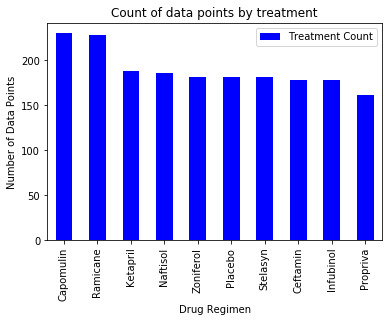

In [159]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Configure plot and ticks of treatment_summary
treatment_bar = treatment_count.plot(kind="bar", facecolor="blue")
#Setting axis titles and graph title
plt.title("Count of data points by treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

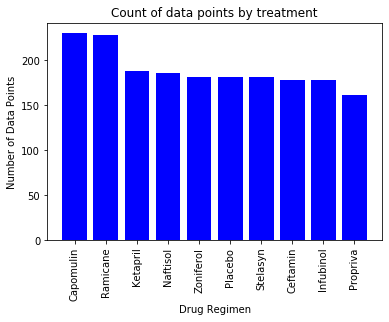

In [160]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Setting x axis
regimen_names = treatment_count.index.tolist()
x_axis = regimen_names

#Configure plot and ticks of treatment_summary
plt.bar(x_axis, treatment_count["Treatment Count"], color="b")
# Create the ticks for our bar chart's x axis
plt.xticks(x_axis, regimen_names, rotation="vertical")
#Setting axis titles and graph title
plt.title("Count of data points by treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


## Pie plots

In [161]:
#Determining gender counts by counting "sex"
gender_count = pd.DataFrame(merge["Sex"].value_counts())
gender_count

,Sex
Male,958
Female,935


Text(0.5, 1.0, 'Distribution of Gender')

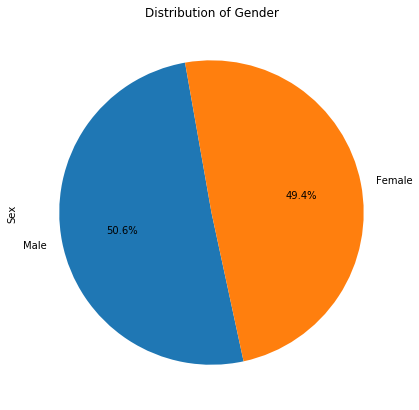

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Pandas pie plot of "Sex"
gender_pie = gender_count.plot.pie(y="Sex", figsize=(7, 7),autopct="%1.1f%%", 
 startangle=100, shadow=False, legend = False, fontsize=10)
plt.title("Distribution of Gender")

Text(0, 0.5, 'Sex')

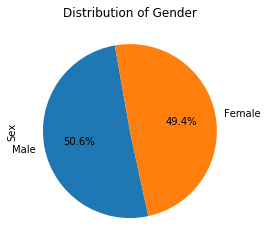

In [163]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot

#Setting labels and explode settings
labels = ["Male", "Female"]
explode = (0,0)
#Creating pyplot pie chart
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=False, startangle=100)
plt.title("Distribution of Gender")
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [164]:
# Final tumor value for Capomulin for each mouse. Calculate the IQR and quantitatively determine if there are any potential outliers.
capo_table = merge[merge["Drug Regimen"].isin(["Capomulin"])]
capo_table = capo_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
capo_table = capo_table.drop_duplicates(subset='Mouse ID', keep="first")
capo_table = capo_table.sort_values("Tumor_Vol", ascending=False)
capo_tumor = capo_table["Tumor_Vol"]
#Compute quartile calculations
quartile1 = capo_tumor.quantile([.25, .5, .75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
iqr1 = upperq1 - lowerq1
print(f"The lower quartile of temperatures is: {lowerq1}")
print(f"The upper quartile of temperatures is: {upperq1}")
print(f"The interquartile range of temperatures is: {iqr1}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [165]:
# Final tumor value for Ramicane for each mouse. Calculate the IQR and quantitatively determine if there are any potential outliers. 
rami_table = merge[merge["Drug Regimen"].isin(["Ramicane"])]
rami_table = rami_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
rami_table = rami_table.drop_duplicates(subset= 'Mouse ID', keep ="first")
rami_table = rami_table.sort_values("Tumor_Vol", ascending=False)
rami_tumor = rami_table["Tumor_Vol"]
#Compute quartile calculations
quartile2 = rami_tumor.quantile([.25, .5, .75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
iqr2 = upperq2 - lowerq2
print(f"The lower quartile of temperatures is: {lowerq2}")
print(f"The upper quartile of temperatures is: {upperq2}")
print(f"The interquartile range of temperatures is: {iqr2}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound2 = lowerq2 - (2.5*iqr2)
upper_bound2 = upperq2 + (2.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 38.125164399999996 
Values below 8.814127750000004 could be outliers.
Values above 63.405348069999995 could be outliers.


In [166]:
# Final tumor value for Infubinol for each mouse. Calculate the IQR and quantitatively determine if there are any potential outliers.
infu_table= merge[merge["Drug Regimen"].isin(["Infubinol"])]
infu_table = infu_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
infu_table = infu_table.drop_duplicates(subset= 'Mouse ID', keep ="first")
infu_table = infu_table.sort_values("Tumor_Vol", ascending=False)
infu_tumor = infu_table["Tumor_Vol"]
#Compute quartile calculations
quartile3 = infu_tumor.quantile([.25, .5, .75])
lowerq3 = quartile1[0.25]
upperq3 = quartile1[0.75]
iqr3 = upperq3 - lowerq3
print(f"The lower quartile of temperatures is: {lowerq3}")
print(f"The upper quartile of temperatures is: {upperq3}")
print(f"The interquartile range of temperatures is: {iqr3}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound3 = lowerq3 - (2.5*iqr3)
upper_bound3 = upperq3 + (2.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 12.922698189999988 could be outliers.
Values above 59.613878950000014 could be outliers.


In [168]:
# Final tumor value for Ceftamin for each mouse. Calculate the IQR and quantitatively determine if there are any potential outliers.
ceft_table= merge[merge["Drug Regimen"].isin(["Ceftamin"])]
ceft_table = ceft_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
ceft_table = ceft_table.drop_duplicates(subset= 'Mouse ID', keep ="first")
ceft_table = ceft_table.sort_values("Tumor_Vol", ascending=False)
ceft_tumor = ceft_table["Tumor_Vol"]
#Compute quartile calculations
quartile4 = ceft_tumor.quantile([.25, .5, .75])
lowerq4 = quartile4[0.25]
upperq4 = quartile4[0.75]
iqr4 = upperq4 - lowerq4
print(f"The lower quartile of temperatures is: {lowerq4}")
print(f"The upper quartile of temperatures is: {upperq4}")
print(f"The interquartile range of temperatures is: {iqr4}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 38.125164399999996 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


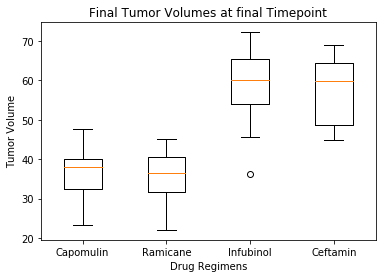

In [171]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = []
data.append(capo_tumor)
data.append(rami_tumor)
data.append(infu_tumor)
data.append(cef_tumor)

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes at final Timepoint')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and scatter plots

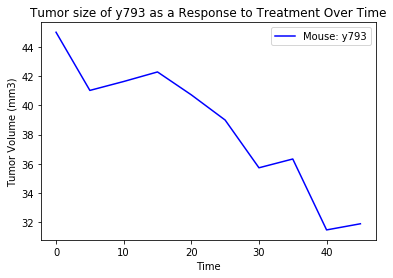

In [174]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Keep only Capomulin and look for a specific mouse
#Capomulin = merge[(merge["Drug Regimen"] == "Capomulin")]
#Capomulin_df = Capomulin.sort_values(["Mouse ID","Timepoint"], ascending=[True, True]).groupby(["Mouse ID","Timepoint","Tumor_Vol"])

Mouse = "y793"

Mouse_df = merge[["Mouse ID", "Timepoint","Tumor_Vol"]]
Mouse_df = Mouse_df.sort_values("Timepoint", ascending=True)
Specific_Mouse = Mouse_df[(Mouse_df["Mouse ID"] == Mouse)]

Mouse_Handle = plt.plot(Specific_Mouse["Timepoint"], Specific_Mouse["Tumor_Vol"], color="blue", label="Mouse: " + Mouse)
# Adds a legend and sets its location to the lower right
plt.title(f"Tumor size of {Mouse} as a Response to Treatment Over Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

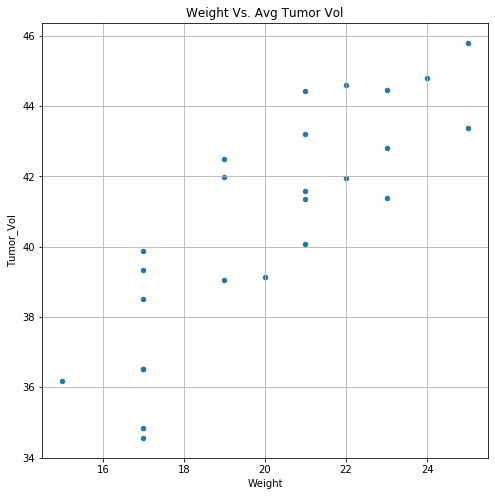

In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Keep only Capomulin and look for a specific mouse
Capomulin = merge[(merge["Drug Regimen"] == "Capomulin")]
#Capomulin.head()
Capomulin = Capomulin[["Mouse ID", "Weight", "Tumor_Vol"]]
#Retrives 9 data points - avg tumor by each weight group
#Capomulin = Capomulin.groupby("Weight").mean()
#Retrives 24 data points - avg tumor by each mouse weight
Capomulin = Capomulin.groupby("Mouse ID").mean()
Capomulin = Capomulin.reset_index()
#Capomulin.head(20)


#Scatter plot which compares Weight to Avg Tumor Volume for Capomulin
Capomulin.plot(kind="scatter", x="Weight", y="Tumor_Vol", grid=True, figsize=(8,8), title="Weight Vs. Avg Tumor Vol")
plt.show()

In [104]:
#compute the Pearson correlation coefficient between weight and tumors
weight = Capomulin.iloc[:, 1]
tumor_volume = Capomulin.iloc[:, 2]
correlation = st.pearsonr(weight, tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


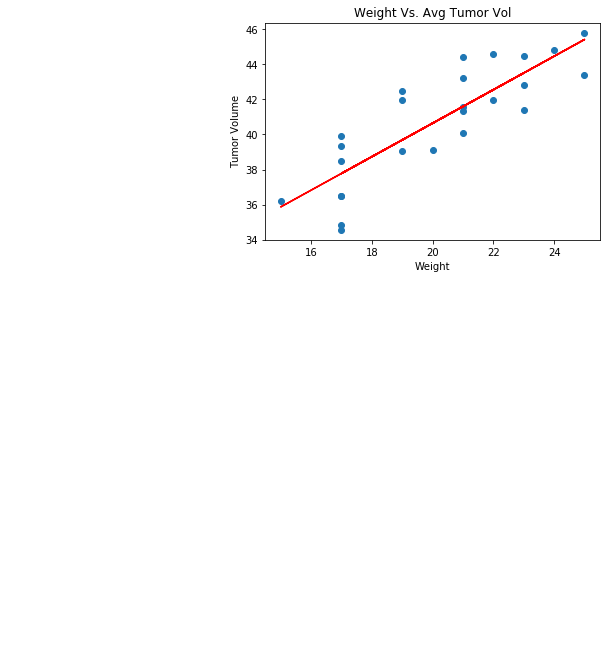

In [105]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin["Weight"]
y_values = Capomulin["Tumor_Vol"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()